# Step 1: Define the Healthy Ranges
For Carbon Dioxide (CO2):

Healthy Range: 350-1500 ppm
Step 2: Create the Simula

## Step 2: Create the Simulator
We'll generate simulated time-series data for Carbon Dioxide (CO2) following the example structure you provided. We'll also integrate the IoTDevice and MQTTPublisher classes.

2.1 Simulator Code for CO2 Pillar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define functions for generating data
def generate_data(mean, std_dev, size=100):
    return np.random.normal(mean, std_dev, size)

# Define the class for IoTDevice
class IoTDevice:
    def __init__(self, device_id, location):
        self.device_id = device_id
        self.location = location
        self.telemetry_data = {}
        self.status = "offline"
        
    def connect(self):
        self.status = "online"
        
    def disconnect(self):
        self.status = "offline"
        
    def send_telemetry(self, data):
        pass
        
    def simulate_telemetry(self):
        pass

# Define a subclass specifically for CO2 monitoring
class CO2Monitor(IoTDevice):
    def simulate_telemetry(self, mean, std_dev, size=100, unhealthy_data=[]):
        healthy_data = generate_data(mean, std_dev, size)
        
        # Insert unhealthy data at specific positions
        data = np.insert(healthy_data, [20, 40, 60, 80, 90], unhealthy_data)
        self.telemetry_data['CO2'] = data

# Simulate CO2 telemetry data
co2_healthy_mean = 925  # Central value of the healthy range
co2_healthy_std_dev = 300  # Adjust for desired fluctuation
co2_unhealthy_data = np.array([280, 1700, 1650, 320, 290])

co2_device = CO2Monitor(device_id="CO2-12345", location="Greenhouse A")
co2_device.simulate_telemetry(co2_healthy_mean, co2_healthy_std_dev, unhealthy_data=co2_unhealthy_data)

# Return first few data points for CO2 to check
co2_device.telemetry_data['CO2'][:10]


array([1155.33250782, 1006.70197681,  379.77033792,  897.41995864,
       1367.50317209,  921.88438056,  762.26521345,  908.22989283,
       1099.36224029,  740.13001988])

The simulator for the CO2 pillar has generated the first 10 data points. As you can see, the values fluctuate around the healthy mean, and we've also inserted some unhealthy values to demonstrate variability.

## 2.2 Plotting the Simulated CO2 Data for Visualization in Jupyter Notebooks
Now, let's visualize the simulated CO2 data using matplotlib. We'll highlight the healthy range with dashed lines and out-of-range values in red to differentiate them.

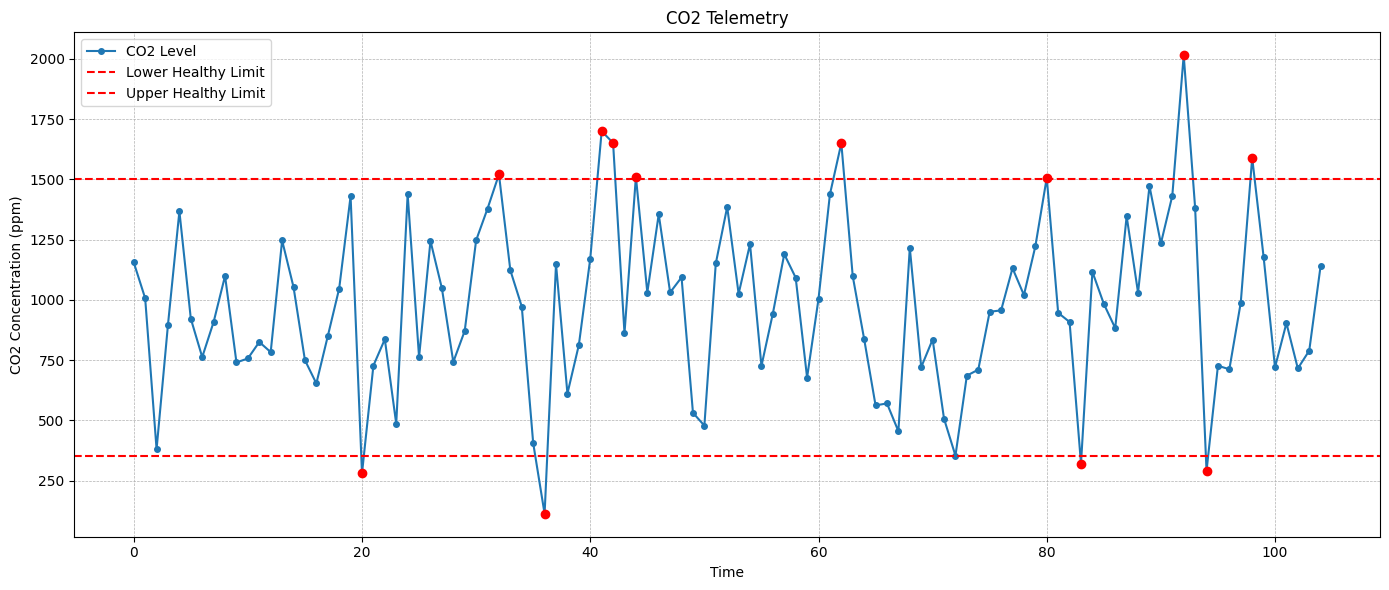

In [2]:
# Plotting the simulated CO2 data
plt.figure(figsize=(14, 6))
plt.plot(co2_device.telemetry_data['CO2'], label='CO2 Level', marker='o', markersize=4)
plt.axhline(y=350, color='r', linestyle='--', label='Lower Healthy Limit')
plt.axhline(y=1500, color='r', linestyle='--', label='Upper Healthy Limit')

# Highlight out-of-range values
for i, val in enumerate(co2_device.telemetry_data['CO2']):
    if val < 350 or val > 1500:
        plt.plot(i, val, 'ro')  # 'ro' means red color, circle marker

plt.title("CO2 Telemetry")
plt.ylabel("CO2 Concentration (ppm)")
plt.xlabel("Time")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Here's the CO2 telemetry plot:

The blue line represents the CO2 concentration over time.
The red dashed lines indicate the healthy range boundaries for CO2 (350 ppm to 1500 ppm).
Points marked in red are the out-of-range values, representing "unhealthy" levels of CO2.

### Step 3: Explanation & Analysis
Carbon Dioxide (CO2) Importance:
Carbon dioxide is essential for the photosynthesis process in plants. Elevated levels of CO2 can improve the rate of photosynthesis, leading to faster growth and increased yield.

Impact of Deviations:

Below Healthy Range: CO2 levels lower than 350 ppm can limit the rate of photosynthesis, slowing plant growth.
Above Healthy Range: While elevated CO2 can benefit plants, extremely high levels (above 1500 ppm) can be detrimental. It can reduce the plant's ability to uptake water, leading to reduced transpiration and potentially overheating.
Potential Reasons for Deviation and Corrective Actions:

Low CO2: Could be due to poor ventilation, overcrowding of plants, or depletion due to excessive plant growth. Corrective measures include introducing CO2 enrichment methods or improving ventilation.
High CO2: Might be caused by excessive CO2 supplementation or inadequate ventilation. Solutions involve reducing CO2 supplementation or enhancing ventilation to allow excess CO2 to dissipate.
This visual representation gives readers a clear understanding of the significance of CO2 levels for plant health and how deviations from the healthy range can impact plant growth and health.